In [373]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

import time

In [374]:
train_data_x=[]
train_data_y=[]
test_data_x=[]
test_data_y=[]
d=28*28
n_train=6000
n_test = 750

for lettre in ["A", "B", "C"] :
    for image_path in glob.glob("./data/train/"+lettre+"/*.png"):
        train_data_x.append(mpimg.imread(image_path))
        if lettre=="A" :
            train_data_y.append(1)
        else :
            train_data_y.append(-1) 
    for image_path in glob.glob("./data/test/"+lettre+"/*.png"):
        test_data_x.append(mpimg.imread(image_path))
        if lettre=="A" :
            test_data_y.append(1)
        else :
            test_data_y.append(-1)

In [375]:
X_train=np.reshape(train_data_x,(n_train,d)) 
Y_train=np.array(train_data_y)
X_test=np.reshape(test_data_x,(n_test,d)) 
Y_test=np.array(test_data_y)

randperm = np.random.permutation(X_train.shape[0])
X_train = X_train[randperm,:]
Y_train = Y_train[randperm]

n_small = 1291
X_train=X_train[:n_small]
Y_train = Y_train[:n_small]

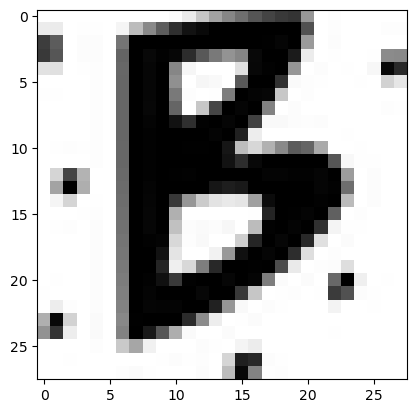

-1


In [376]:
i = np.random.randint(n_small)
plt.imshow(np.reshape(X_train[i],(28,28)), cmap='binary')
plt.show()
print(Y_train[i])

In [377]:
def emp_risk(theta):
    return np.linalg.norm(Y_train-X_train@theta)**2/n_small

def test_risk(theta):
    return np.linalg.norm(Y_test-X_test@theta)**2/n_test

In [378]:
def grad_emp_risk(theta):
    return -2*X_train.T@(Y_train-X_train@theta)/n_small

In [392]:
T_gd = 300
emp_risks_gd = np.zeros(T_gd)
test_risks_gd = np.zeros(T_gd)
theta = np.zeros(X_train.shape[1])
gamma = 0.001
for t in range(T_gd):
    emp_risks_gd[t] = emp_risk(theta)
    test_risks_gd[t] = test_risk(theta)
    theta -= gamma*grad_emp_risk(theta)

In [393]:
def grad_sto(theta,i):
    return -2*(Y_train[i%n_small]-X_train[i%n_small]@theta)*X_train[i%n_small]

In [394]:
T_sgd = T_gd*n_small
T_test_period = 1000
emp_risks_sgd = np.zeros(int(T_sgd/T_test_period)+1)
test_risks_sgd = np.zeros(int(T_sgd/T_test_period)+1)
theta = np.zeros(X_train.shape[1])
gamma = 0.00005
for t in range(T_sgd):
    if t%T_test_period == 0:
        emp_risks_sgd[int(t/T_test_period)] = emp_risk(theta)
        test_risks_sgd[int(t/T_test_period)] = test_risk(theta)    
    theta -= gamma*grad_sto(theta,t)

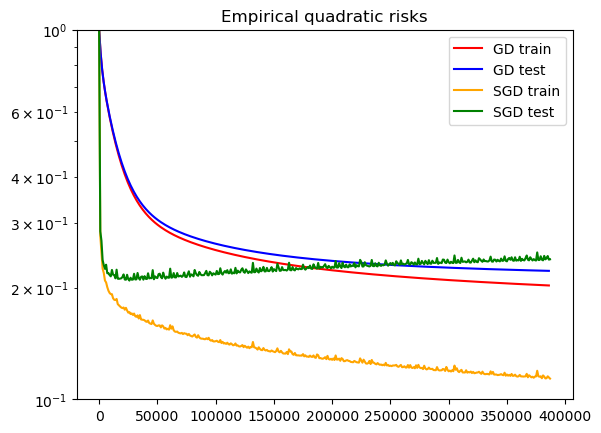

In [397]:
ts_gd = [n_small*t for t in range(T_gd)]
ts_sgd = [t*T_test_period for t in range(int(T_sgd/T_test_period)+1)]
plt.semilogy(ts_gd, emp_risks_gd, 'red', label='GD train')
plt.semilogy(ts_gd, test_risks_gd, 'blue', label='GD test')
plt.semilogy(ts_sgd, emp_risks_sgd, 'orange', label = 'SGD train')
plt.semilogy(ts_sgd, test_risks_sgd, 'green', label = 'SGD test')
plt.legend()
plt.ylim(10**(-1),1)
plt.title('Empirical quadratic risks')
plt.show()